In [4]:
import numpy as np 
import pandas as pd


In [16]:
data = pd.read_csv('amazon_co-ecommerce_sample.csv')

In [147]:
data.head()

,index,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
2437,2437,5117fb8b972e89434512d321a5932f9e,Princess Elise Magnetic Dress Up Playset,Melissa & Doug,9.99,6 new,6,1.0,4.7 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessories,http://www.amazon.co.uk/Melissa-Doug-Ballerina...,This set includes a magnetic wooden doll with ...,Technical Details Item Weight907 g Product Dim...,This set includes a magnetic wooden doll with ...,http://www.amazon.co.uk/Melissa-Doug-Ballerina...,NaN,A wonderful toy! // 5.0 // 25 Jan. 2013 // By\...,"{""seller""=>[{""Seller_name_1""=>""TheUsefulShop"",..."
7910,7910,130a2483894e3f93371e3e5c8cba6960,Traditional Painted Wooden Farm Tractor 22cm X...,PinkWebShop,5.70,NaN,1,NaN,5.0 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessor...,http://www.amazon.co.uk/Janod-Wooden-Tractor-w...,AGP Traditional Painted Wooden Farm Tractor 22...,Technical Details Item Weight835 g Product Dim...,AGP Traditional Painted Wooden Farm Tractor 22...,http://www.amazon.co.uk/GoKi-GK370-Wooden-Farm...,NaN,Great // 5.0 // 2 Nov. 2015 // By\n \n A...,NaN
7914,7914,6dbbab031acb685633a685a38bab2917,Barbie Dream House Playset,Barbie,214.99,5 new,17,4.0,4.2 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessor...,http://www.amazon.co.uk/Barbie-Life-In-The-Dre...,Product Description Move right into the Barbie...,Technical Details Item Weight12 Kg Product Dim...,Product Description Move right into the Barbie...,http://www.amazon.co.uk/Barbie-BJP34-Malibu-Ho...,"What are the exact dimensions when assembled, ...",Hours of fun! // 5.0 // 9 Jan. 2016 // By\n ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
7915,7915,8e7c4ff3f6fc14645810d02c69d00742,Barbie My Style House Dinner Date,Barbie,10.62,5 new,12,4.0,4.7 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessor...,http://www.amazon.co.uk/Barbie-My-Style-House-...,Product Description Barbie doll is known for h...,Technical Details Item Weight259 g Product Dim...,Product Description Barbie doll is known for h...,http://www.amazon.co.uk/Barbie-My-Style-House-...,NaN,"It's very cute and sturdy enough, really light...","{""seller""=>[{""Seller_name_1""=>""E-merchandise"",..."
9061,9061,3c09c794532a3d311cc21a9ecdea8eb1,Red Panda Ooma The Zelfs Series 4 Medium Zelfs,Character,14.99,3 new,1,1.0,5.0 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessories,http://www.amazon.co.uk/The-Zelfs-Series-Mediu...,Meet the Zelfs! The newest and cutest collecta...,Technical Details Item Weight59 g Product Dime...,Meet the Zelfs! The newest and cutest collecta...,http://www.amazon.co.uk/The-Zelfs-Series-Plays...,NaN,Five Stars // 5.0 // 1 Oct. 2015 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""rayners*enterta..."


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 2437 to 9570
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   index                                        6 non-null      int64  
 1   uniq_id                                      6 non-null      object 
 2   product_name                                 6 non-null      object 
 3   manufacturer                                 6 non-null      object 
 4   price                                        6 non-null      float64
 5   number_available_in_stock                    5 non-null      object 
 6   number_of_reviews                            6 non-null      object 
 7   number_of_answered_questions                 5 non-null      float64
 8   average_review_rating                        6 non-null      object 
 9   amazon_category_and_sub_category             6 non-null      object 
 10  custo

In [155]:
#lets drop irrelevant columns
columns_to_drop = ['uniq_id', 'index', 'customer_questions_and_answers', 'sellers']
existing_columns = [col for col in columns_to_drop if col in data.columns]

data = data.drop(existing_columns, axis=1)

print(data.columns)


Index(['product_name', 'manufacturer', 'price', 'number_available_in_stock',
       'number_of_reviews', 'number_of_answered_questions',
       'average_review_rating', 'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item', 'customer_reviews'],
      dtype='object')


In [157]:
#Convert "price" to numeric ( remove pound sign or commas ,)
data['price'] = data['price'].replace('[£,]', '', regex=True)

# Handle NaN values and extract the lower price from ranges
data['price'] = data['price'].apply(lambda x: float(x.split('-')[0].strip()) if isinstance(x, str) and '-' in x else float(x) if isinstance(x, str) else x)


In [159]:
#check for missing value in price
data['price'].isnull().sum()


0

In [161]:
#fill the missing prices as the missing price is high 
#we do not want to lose valuable data so 
#we are going  to replace it with median prices
#to keep the data

In [163]:
median_price = data['price'].median()
data['price'] = data['price'].fillna(median_price)

data.head()


,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_reviews
2437,Princess Elise Magnetic Dress Up Playset,Melissa & Doug,9.99,6 new,6,1.0,4.7 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessories,http://www.amazon.co.uk/Melissa-Doug-Ballerina...,This set includes a magnetic wooden doll with ...,Technical Details Item Weight907 g Product Dim...,This set includes a magnetic wooden doll with ...,http://www.amazon.co.uk/Melissa-Doug-Ballerina...,A wonderful toy! // 5.0 // 25 Jan. 2013 // By\...
7910,Traditional Painted Wooden Farm Tractor 22cm X...,PinkWebShop,5.70,NaN,1,NaN,5.0 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessor...,http://www.amazon.co.uk/Janod-Wooden-Tractor-w...,AGP Traditional Painted Wooden Farm Tractor 22...,Technical Details Item Weight835 g Product Dim...,AGP Traditional Painted Wooden Farm Tractor 22...,http://www.amazon.co.uk/GoKi-GK370-Wooden-Farm...,Great // 5.0 // 2 Nov. 2015 // By\n \n A...
7914,Barbie Dream House Playset,Barbie,214.99,5 new,17,4.0,4.2 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessor...,http://www.amazon.co.uk/Barbie-Life-In-The-Dre...,Product Description Move right into the Barbie...,Technical Details Item Weight12 Kg Product Dim...,Product Description Move right into the Barbie...,http://www.amazon.co.uk/Barbie-BJP34-Malibu-Ho...,Hours of fun! // 5.0 // 9 Jan. 2016 // By\n ...
7915,Barbie My Style House Dinner Date,Barbie,10.62,5 new,12,4.0,4.7 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessor...,http://www.amazon.co.uk/Barbie-My-Style-House-...,Product Description Barbie doll is known for h...,Technical Details Item Weight259 g Product Dim...,Product Description Barbie doll is known for h...,http://www.amazon.co.uk/Barbie-My-Style-House-...,"It's very cute and sturdy enough, really light..."
9061,Red Panda Ooma The Zelfs Series 4 Medium Zelfs,Character,14.99,3 new,1,1.0,5.0 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessories,http://www.amazon.co.uk/The-Zelfs-Series-Mediu...,Meet the Zelfs! The newest and cutest collecta...,Technical Details Item Weight59 g Product Dime...,Meet the Zelfs! The newest and cutest collecta...,http://www.amazon.co.uk/The-Zelfs-Series-Plays...,Five Stars // 5.0 // 1 Oct. 2015 // By\n \n...


In [165]:
#cleaning text data(like product descriptions)


In [167]:
import re
#creating func clean_text 
def clean_text(text):
    if isinstance(text, str):
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Remove special characters, numbers, and punctuation
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        return text
    return text


In [169]:
# apply() uses the clean_text function to each rows in prod_description and cust_review
fashion_data.loc[:, 'product_description'] = fashion_data['product_description'].apply(clean_text)
fashion_data.loc[:, 'customer_reviews'] = fashion_data['customer_reviews'].apply(clean_text)
fashion_data.head()



,index,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,sentiment_score,sentiment_label
2437,2437,5117fb8b972e89434512d321a5932f9e,Princess Elise Magnetic Dress Up Playset,Melissa & Doug,9.99,6 new,6,1.0,4.7 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessories,http://www.amazon.co.uk/Melissa-Doug-Ballerina...,This set includes a magnetic wooden doll with ...,Technical Details Item Weight907 g Product Dim...,this set includes a magnetic wooden doll with ...,http://www.amazon.co.uk/Melissa-Doug-Ballerina...,NaN,a wonderful toy jan by\n \n middle...,"{""seller""=>[{""Seller_name_1""=>""TheUsefulShop"",...",0.235742,Positive
7910,7910,130a2483894e3f93371e3e5c8cba6960,Traditional Painted Wooden Farm Tractor 22cm X...,PinkWebShop,5.70,NaN,1,NaN,5.0 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessor...,http://www.amazon.co.uk/Janod-Wooden-Tractor-w...,AGP Traditional Painted Wooden Farm Tractor 22...,Technical Details Item Weight835 g Product Dim...,agp traditional painted wooden farm tractor c...,http://www.amazon.co.uk/GoKi-GK370-Wooden-Farm...,NaN,great nov by\n \n amazon customer\...,NaN,0.800000,Positive
7914,7914,6dbbab031acb685633a685a38bab2917,Barbie Dream House Playset,Barbie,214.99,5 new,17,4.0,4.2 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessor...,http://www.amazon.co.uk/Barbie-Life-In-The-Dre...,Product Description Move right into the Barbie...,Technical Details Item Weight12 Kg Product Dim...,product description move right into the barbie...,http://www.amazon.co.uk/Barbie-BJP34-Malibu-Ho...,"What are the exact dimensions when assembled, ...",hours of fun jan by\n \n gracie\n ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",0.082756,Neutral
7915,7915,8e7c4ff3f6fc14645810d02c69d00742,Barbie My Style House Dinner Date,Barbie,10.62,5 new,12,4.0,4.7 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessor...,http://www.amazon.co.uk/Barbie-My-Style-House-...,Product Description Barbie doll is known for h...,Technical Details Item Weight259 g Product Dim...,product description barbie doll is known for h...,http://www.amazon.co.uk/Barbie-My-Style-House-...,NaN,its very cute and sturdy enough really light ...,"{""seller""=>[{""Seller_name_1""=>""E-merchandise"",...",0.420346,Positive
9061,9061,3c09c794532a3d311cc21a9ecdea8eb1,Red Panda Ooma The Zelfs Series 4 Medium Zelfs,Character,14.99,3 new,1,1.0,5.0 out of 5 stars,Dolls & Accessories > Fashion Dolls & Accessories,http://www.amazon.co.uk/The-Zelfs-Series-Mediu...,Meet the Zelfs! The newest and cutest collecta...,Technical Details Item Weight59 g Product Dime...,meet the zelfs the newest and cutest collectab...,http://www.amazon.co.uk/The-Zelfs-Series-Plays...,NaN,five stars oct by\n \n rebecca ken...,"{""seller""=>[{""Seller_name_1""=>""rayners*enterta...",0.000000,Neutral


In [288]:
#feature extraction 
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # You can adjust max_features as needed

# Transform the product descriptions and customer reviews into numerical vectors
product_desc_tfidf = tfidf_vectorizer.fit_transform(fashion_data['product_description'])
customer_reviews_tfidf = tfidf_vectorizer.fit_transform(fashion_data['customer_reviews'])

# Check the shape of the transformed data (rows are products, columns are words)
print(f"Product Description TF-IDF shape: {product_desc_tfidf.shape}")
print(f"Customer Reviews TF-IDF shape: {customer_reviews_tfidf.shape}")



Product Description TF-IDF shape: (6, 363)
Customer Reviews TF-IDF shape: (6, 329)


In [294]:
#k-NN model to find similar products
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import hstack

# Combine product description and customer reviews TF-IDF matrices
combined_tfidf = hstack([product_desc_tfidf, customer_reviews_tfidf])

# Initialize k-NN model
knn = NearestNeighbors(n_neighbors=5, metric='cosine')

# Fit the model on the combined TF-IDF matrix
knn.fit(combined_tfidf)

# Find the nearest neighbors for the first product (you can change this index)
distances, indices = knn.kneighbors(combined_tfidf[0], n_neighbors=5)

# Show the results
print("Nearest products to the first product:")
for i, idx in enumerate(indices[0]):
    print(f"Product {i+1}: {fashion_data.iloc[idx]['product_name']} (Distance: {distances[0][i]})")


Nearest products to the first product:
Product 1: Princess Elise Magnetic Dress Up Playset (Distance: 1.1102230246251565e-16)
Product 2: Barbie Dream House Playset (Distance: 0.8612972386366141)
Product 3: Barbie My Style House Dinner Date (Distance: 0.8624149424666436)
Product 4: Traditional Painted Wooden Farm Tractor 22cm X 12cm - Red (Distance: 0.8998836880007455)
Product 5: Red Panda Ooma The Zelfs Series 4 Medium Zelfs (Distance: 0.9754287469397674)


In [301]:
# since already have a fitted k-NN model and combined_tfidf from previous steps

# Function to recommend similar products based on a specific product
def recommend_similar_products(product_index, n_neighbors=5):
    distances, indices = knn.kneighbors(combined_tfidf[product_index], n_neighbors=n_neighbors)
    
    recommendations = []
    for i, idx in enumerate(indices[0]):
        product_info = fashion_data.iloc[idx]
        recommendations.append({
            'Product Name': product_info['product_name'],
            'Price': product_info['price'],
            'Distance': distances[0][i]
        })
    return recommendations

# Example: Get recommendations for the first product in the DataFrame
product_index = 0  # Change this to the product index you're interested in
recommended_products = recommend_similar_products(product_index)

# Display the recommended products
print("Recommended Products:")
for i, recommendation in enumerate(recommended_products):
    print(f"{i+1}. {recommendation['Product Name']} - Price: ${recommendation['Price']} (Distance: {recommendation['Distance']})")




Recommended Products:
1. Princess Elise Magnetic Dress Up Playset - Price: $9.99 (Distance: 1.1102230246251565e-16)
2. Barbie Dream House Playset - Price: $214.99 (Distance: 0.8612972386366141)
3. Barbie My Style House Dinner Date - Price: $10.62 (Distance: 0.8624149424666436)
4. Traditional Painted Wooden Farm Tractor 22cm X 12cm - Red - Price: $5.7 (Distance: 0.8998836880007455)
5. Red Panda Ooma The Zelfs Series 4 Medium Zelfs - Price: $14.99 (Distance: 0.9754287469397674)


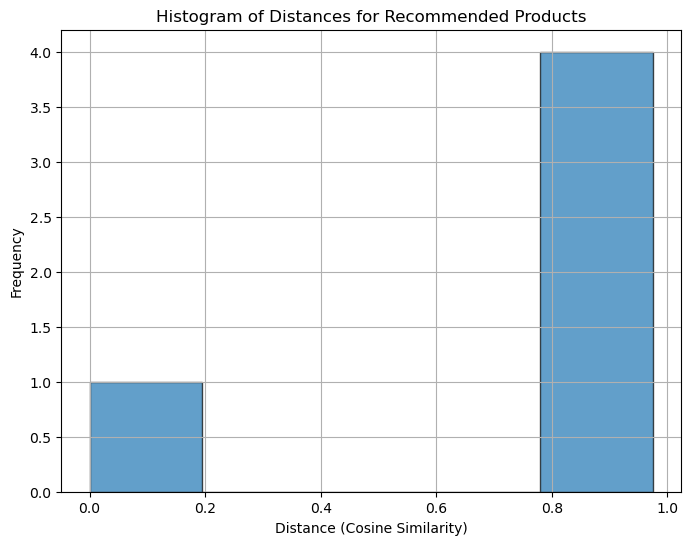

In [303]:

import matplotlib.pyplot as plt

# Extracting the distances from the recommended products
distances = [recommendation['Distance'] for recommendation in recommended_products]

# Plot histogram of distances
plt.figure(figsize=(8, 6))
plt.hist(distances, bins=5, edgecolor='black', alpha=0.7)
plt.title('Histogram of Distances for Recommended Products')
plt.xlabel('Distance (Cosine Similarity)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



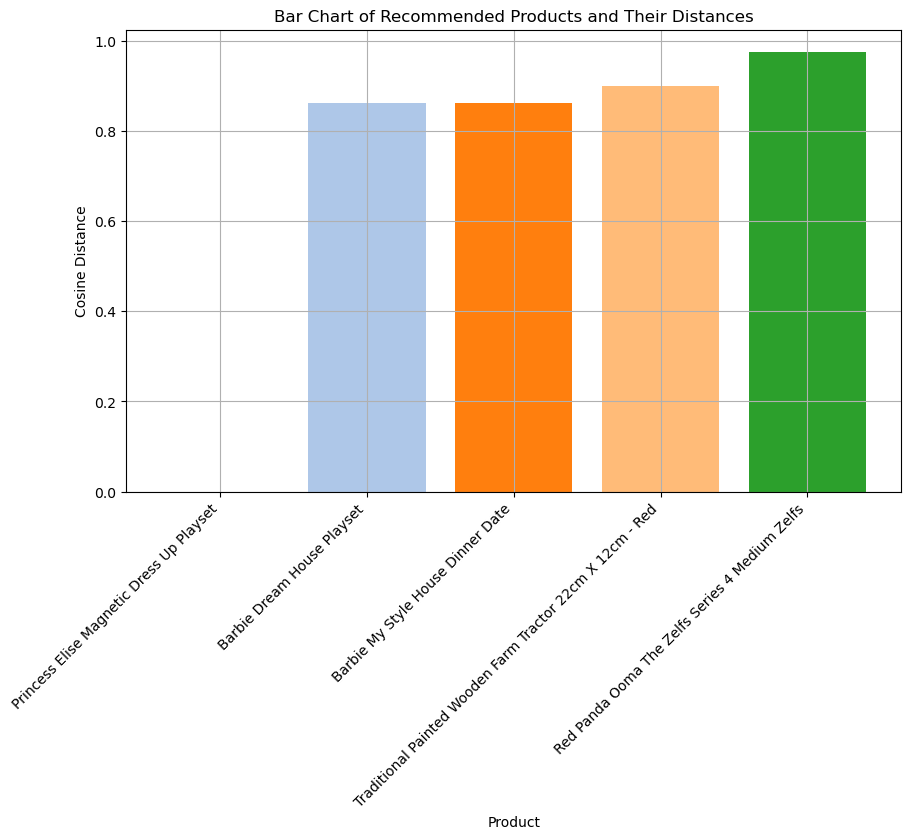

In [321]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for the bar chart
product_names = [recommendation['Product Name'] for recommendation in recommended_products]
prices = [recommendation['Price'] for recommendation in recommended_products]
distances = [recommendation['Distance'] for recommendation in recommended_products]

# Create a DataFrame
df = pd.DataFrame({
    'Product': product_names,
    'Price': prices,
    'Distance': distances
})

# Define a list of distinct colors for each bar
colors = sns.color_palette("tab20", len(df))

# Plot bar chart with manually assigned colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Product'], df['Distance'], color=colors)

# Adding labels and title
plt.title('Bar Chart of Recommended Products and Their Distances')
plt.xlabel('Product')
plt.ylabel('Cosine Distance')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add grid lines
plt.grid(True)

plt.show()
